<a href="https://colab.research.google.com/github/AlexAlexeyuk/Researchs/blob/master/CKD_mortalyty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 27 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,"21 days, 3 hours and 7 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_2ibyen
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [3]:
data = h2o.import_file('/content/cleaned_data')
data['Surv'] = data['Surv'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [13]:
data.describe()

Rows:113
Cols:9




,Gender,Age,AF,Localisation,AMI_Unst.ang,GFR,Surv,Q_non_Q,DM
type,enum,int,enum,enum,enum,int,enum,enum,enum
mins,,56.0,,,,9.0,,,
mean,,77.52212389380533,,,,43.00000000000002,,,
maxs,,117.0,,,,98.0,,,
sigma,,9.962516665277997,,,,20.34128454997022,,,
zeros,,0,,,,0,,,
missing,0,0,0,0,0,0,0,0,0
0,male,56.0,No_AF,Left_car,AMI,14.0,death,non_Q,Diabetes
1,male,59.0,No_AF,Left_car,Unst_ang,98.0,alive,nan,No_Diabetes
2,female,86.0,AF,Left_car,AMI,57.0,death,non_Q,Diabetes


In [15]:
data['Surv'].table()

Surv,Count
alive,52
death,61


In [16]:
data['Gender'].table()

Gender,Count
female,83
male,30


In [4]:
from h2o.automl import H2OAutoML
from h2o.estimators import H2OXGBoostEstimator

In [5]:
# Set predictors and response variable
response = "Surv"
predictors = data.col_names.remove(response)


In [6]:
# split
train, test = data.split_frame(seed = 1234, 
                                  ratios = [0.75], 
                                  destination_frames = ["train.hex", "test.hex"])

In [7]:
train.col_names

['Gender',
 'Age',
 'AF',
 'Localisation',
 'AMI_Unst.ang',
 'GFR',
 'Surv',
 'Q_non_Q',
 'DM']

In [8]:
stroke_xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)

In [10]:
stroke_xgb.train(x=predictors,
                  y=response,
                  training_frame=train,
                  validation_frame=test)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [11]:
stroke_xgb.accuracy

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1607452996469_1


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.015067316837166781
RMSE: 0.12274899933264947
LogLoss: 0.09380211190408486
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6639729738235474: 


,,alive,death,Error,Rate
0,alive,38.0,0.0,0.0,(0.0/38.0)
1,death,0.0,46.0,0.0,(0.0/46.0)
2,Total,38.0,46.0,0.0,(0.0/84.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.663973,1.000000,35.0
1,max f2,0.663973,1.000000,35.0
2,max f0point5,0.663973,1.000000,35.0
3,max accuracy,0.663973,1.000000,35.0
4,max precision,0.995439,1.000000,0.0
5,max recall,0.663973,1.000000,35.0
6,max specificity,0.995439,1.000000,0.0
7,max absolute_mcc,0.663973,1.000000,35.0
8,max min_per_class_accuracy,0.663973,1.000000,35.0
9,max mean_per_class_accuracy,0.663973,1.000000,35.0



Gains/Lift Table: Avg response rate: 54.76 %, avg score: 54.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011905,0.995192,1.826087,1.826087,1.000000,0.995439,1.000000,0.995439,0.021739,0.021739,82.608696,82.608696,0.021739
1,2,0.035714,0.995142,1.826087,1.826087,1.000000,0.995142,1.000000,0.995241,0.043478,0.065217,82.608696,82.608696,0.065217
2,3,0.035714,0.992597,0.000000,1.826087,0.000000,0.000000,1.000000,0.995241,0.000000,0.065217,-100.000000,82.608696,0.065217
3,4,0.047619,0.989711,1.826087,1.826087,1.000000,0.989949,1.000000,0.993918,0.021739,0.086957,82.608696,82.608696,0.086957
4,5,0.059524,0.988692,1.826087,1.826087,1.000000,0.989205,1.000000,0.992975,0.021739,0.108696,82.608696,82.608696,0.108696
5,6,0.107143,0.976301,1.826087,1.826087,1.000000,0.979128,1.000000,0.986821,0.086957,0.195652,82.608696,82.608696,0.195652
6,7,0.166667,0.972070,1.826087,1.826087,1.000000,0.973760,1.000000,0.982156,0.108696,0.304348,82.608696,82.608696,0.304348
7,8,0.214286,0.963403,1.826087,1.826087,1.000000,0.965606,1.000000,0.978479,0.086957,0.391304,82.608696,82.608696,0.391304
8,9,0.297619,0.951131,1.826087,1.826087,1.000000,0.958513,1.000000,0.972888,0.152174,0.543478,82.608696,82.608696,0.543478
9,10,0.404762,0.929774,1.826087,1.826087,1.000000,0.943131,1.000000,0.965011,0.195652,0.739130,82.608696,82.608696,0.739130




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1352525926611422
RMSE: 0.3677670358544145
LogLoss: 0.45461246524198584
Mean Per-Class Error: 0.1428571428571428
AUC: 0.8333333333333333
AUCPR: 0.7947086878776422
Gini: 0.6666666666666665

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.479613333940506: 


,,alive,death,Error,Rate
0,alive,10.0,4.0,0.2857,(4.0/14.0)
1,death,0.0,15.0,0.0,(0.0/15.0)
2,Total,10.0,19.0,0.1379,(4.0/29.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.479613,0.882353,15.0
1,max f2,0.479613,0.949367,15.0
2,max f0point5,0.479613,0.824176,15.0
3,max accuracy,0.479613,0.862069,15.0
4,max precision,0.995439,1.000000,0.0
5,max recall,0.479613,1.000000,15.0
6,max specificity,0.995439,1.000000,0.0
7,max absolute_mcc,0.479613,0.750939,15.0
8,max min_per_class_accuracy,0.712793,0.785714,12.0
9,max mean_per_class_accuracy,0.479613,0.857143,15.0



Gains/Lift Table: Avg response rate: 51.72 %, avg score: 57.53 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.034483,0.994658,1.933333,1.933333,1.000000,0.995439,1.000000,0.995439,0.066667,0.066667,93.333333,93.333333,0.066667
1,2,0.034483,0.993876,0.000000,1.933333,0.000000,0.000000,1.000000,0.995439,0.000000,0.066667,-100.000000,93.333333,0.066667
2,3,0.034483,0.993094,0.000000,1.933333,0.000000,0.000000,1.000000,0.995439,0.000000,0.066667,-100.000000,93.333333,0.066667
3,4,0.068966,0.988501,1.933333,1.933333,1.000000,0.992648,1.000000,0.994043,0.066667,0.133333,93.333333,93.333333,0.133333
4,5,0.068966,0.978825,0.000000,1.933333,0.000000,0.000000,1.000000,0.994043,0.000000,0.133333,-100.000000,93.333333,0.133333
5,6,0.103448,0.950494,1.933333,1.933333,1.000000,0.958090,1.000000,0.982059,0.066667,0.200000,93.333333,93.333333,0.200000
6,7,0.172414,0.947517,0.000000,1.160000,0.000000,0.948595,0.600000,0.968673,0.000000,0.200000,-100.000000,16.000000,0.057143
7,8,0.206897,0.940497,1.933333,1.288889,1.000000,0.943206,0.666667,0.964429,0.066667,0.266667,93.333333,28.888889,0.123810
8,9,0.310345,0.893399,1.933333,1.503704,1.000000,0.932671,0.777778,0.953843,0.200000,0.466667,93.333333,50.370370,0.323810
9,10,0.413793,0.821226,1.288889,1.450000,0.666667,0.838240,0.750000,0.924942,0.133333,0.600000,28.888889,45.000000,0.385714




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-12-08 18:47:23,0.225 sec,0.0,0.500000,0.693147,0.500000,0.547619,1.000000,0.452381,0.500000,0.693147,0.500000,0.517241,1.000000,0.482759
1,,2020-12-08 18:47:23,0.523 sec,1.0,0.435589,0.571179,0.916476,0.916969,1.826087,0.130952,0.437801,0.575176,0.907143,0.889835,1.933333,0.103448
2,,2020-12-08 18:47:23,0.587 sec,2.0,0.385414,0.482264,0.963959,0.971446,1.826087,0.107143,0.432591,0.563501,0.845238,0.739849,1.160000,0.137931
3,,2020-12-08 18:47:23,0.629 sec,3.0,0.343067,0.409914,0.969680,0.977621,1.826087,0.071429,0.411341,0.524594,0.842857,0.741206,1.160000,0.103448
4,,2020-12-08 18:47:23,0.683 sec,4.0,0.311040,0.356214,0.979977,0.984977,1.826087,0.071429,0.404123,0.511237,0.833333,0.701032,0.000000,0.103448
5,,2020-12-08 18:47:23,0.750 sec,5.0,0.289920,0.318781,0.978833,0.983602,1.826087,0.071429,0.390257,0.487077,0.833333,0.701032,0.000000,0.103448
6,,2020-12-08 18:47:23,0.815 sec,6.0,0.271708,0.287017,0.982838,0.986580,1.826087,0.059524,0.387919,0.485814,0.823810,0.693803,0.000000,0.137931
7,,2020-12-08 18:47:23,0.881 sec,7.0,0.261601,0.268019,0.985698,0.988904,1.826087,0.059524,0.377993,0.465377,0.861905,0.823204,1.933333,0.103448
8,,2020-12-08 18:47:23,0.926 sec,8.0,0.249866,0.247363,0.987414,0.990416,1.826087,0.047619,0.370021,0.456082,0.866667,0.823267,1.933333,0.137931
9,,2020-12-08 18:47:23,0.970 sec,9.0,0.241628,0.231920,0.987414,0.990416,1.826087,0.047619,0.369796,0.461760,0.871429,0.826253,1.933333,0.103448



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GFR,88.050262,1.000000,0.475675
1,AMI_Unst.ang.AMI,31.414286,0.356777,0.169710
2,Age,28.431400,0.322900,0.153595
3,AF.AF,26.931522,0.305865,0.145493
4,Q_non_Q.nan,8.472639,0.096225,0.045772
5,Localisation.Left_car,1.381596,0.015691,0.007464
6,Localisation.Right_car,0.424156,0.004817,0.002291


<bound method H2OBinomialModel.accuracy of >

In [20]:
stroke_xgb.auc(valid=test)

0.8333333333333333

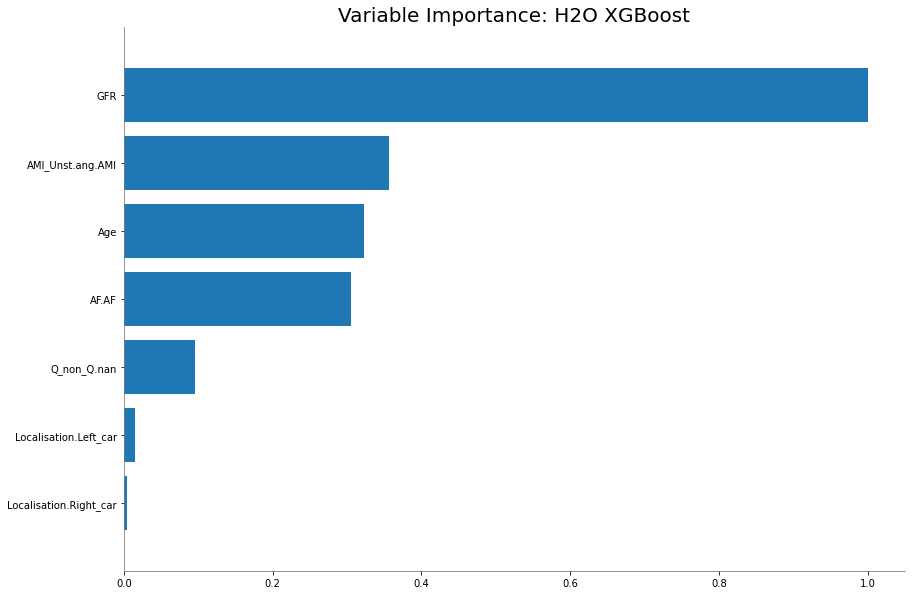

In [23]:
stroke_xgb.varimp_plot()

In [ ]:
aml = H2OAutoML(max_models = 6, max_runtime_secs = 120, seed = 12345)
aml.train(x = predictors, y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
aml_ = H2OAutoML(max_models = 6, max_runtime_secs = 120, seed = 12345)
aml_.train(x = predictors, y = response, training_frame = train, leaderboard_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
aml.m

In [ ]:
lb = aml.leaderboard

In [ ]:
lb.head(rows=5)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_20201128_095618,0.909524,0.395232,0.896149,0.107143,0.326849,0.10683
DRF_1_AutoML_20201128_095618,0.895238,0.404048,0.861139,0.0714286,0.343073,0.117699
StackedEnsemble_BestOfFamily_AutoML_20201128_095618,0.885714,0.399114,0.83683,0.0714286,0.322372,0.103924
StackedEnsemble_AllModels_AutoML_20201128_095618,0.885714,0.410028,0.83683,0.0714286,0.343867,0.118245
GLM_1_AutoML_20201128_095618,0.866667,0.608981,0.8412,0.142857,0.411384,0.169236


In [ ]:
aml.varimp_heatmap


<bound method varimp_heatmap of <h2o.automl.autoh2o.H2OAutoML object at 0x7fbb89f4fac8>>

In [ ]:
import scipy
from scipy import stats
x = data[data['Surv'] == 'death']['GFR']
y = data[data['Surv'] == 'alive']['GFR']


In [ ]:
y

GFR
98
69
86
52
47
21
46
21
75
66


In [ ]:
x.name, y.name = 'death', 'alive'

In [ ]:
x = [i for i in x]

In [ ]:
y = [i for i in y]
y

In [ ]:
res = stats.ttest_ind(x, y)
print('p-value: ', res[1])

In [ ]:
from h2o.estimators.coxph import H2OCoxProportionalHazardsEstimator

In [ ]:
data.col_names

['Gender',
 'Age',
 'AF',
 'Localisation',
 'AMI_Unst.ang',
 'GFR',
 'Surv',
 'Q_non_Q',
 'DM']

In [ ]:
stroke_coxph = H2OCoxProportionalHazardsEstimator(
                                                 stop_column="GFR",
                                                 ties="breslow")
stroke_coxph.train(x=predictors,
            y=response,
            training_frame=train)

coxph Model Build progress: |█████████████████████████████████████████████| 100%


In [ ]:

pred = stroke_coxph.predict(test)

coxph prediction progress: |██████████████████████████████████████████████| 100%


In [ ]:
stroke_coxph.coefficients_table

Model Details
H2OCoxProportionalHazardsEstimator :  Cox Proportional Hazards
Model Key:  CoxPH_model_python_1606551964032_5039

Call: 
Surv(GFR, Surv) ~ Gender + Age + AF + Localisation + AMI_Unst.ang + Q_non_Q + DM

Coefficients: CoxPH Coefficients


,names,coefficients,exp_coef,exp_neg_coef,se_coef,z_coef
0,Localisation.Right_car,0.392314,1.480402,0.675492,0.369326,1.062241
1,Localisation.Vertebro_bas,-0.100475,0.904408,1.105696,0.552015,-0.182014
2,AF.No_AF,-0.642116,0.526178,1.900497,0.364355,-1.762336
3,Gender.male,-0.477382,0.620405,1.611849,0.443702,-1.075907
4,AMI_Unst.ang.Unst_ang,-2.221644,0.108431,9.222478,0.794870,-2.794976
5,Q_non_Q.non_Q,-0.462309,0.629828,1.587735,0.412219,-1.121511
6,DM.No_Diabetes,-0.672368,0.510498,1.958871,0.372038,-1.807257
7,Age,0.005536,1.005551,0.994480,0.020572,0.269083



Likelihood ratio test=27.712016
n=84, number of events=46

Scoring History: 


,,timestamp,duration,iterations,loglik
0,,2020-11-28 10:06:25,0.000 sec,0,-178.081986
1,,2020-11-28 10:06:25,0.004 sec,1,-165.529541
2,,2020-11-28 10:06:25,0.007 sec,2,-164.291944
3,,2020-11-28 10:06:25,0.009 sec,3,-164.226643
4,,2020-11-28 10:06:25,0.013 sec,4,-164.225978


<bound method H2OCoxPHModel.coefficients_table of >